# K Means Clustering #

## Making Clusters ##

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [41]:
myX, _ = make_blobs(300)  # The defaults should be good--see the sklearn webpage

In [42]:
myX[:5]

array([[-1.97407162,  0.3158997 ],
       [ 1.85979441,  6.35951086],
       [ 3.40341271,  6.05147589],
       [ 3.3115618 ,  4.93103311],
       [-6.14118783,  3.17116188]])

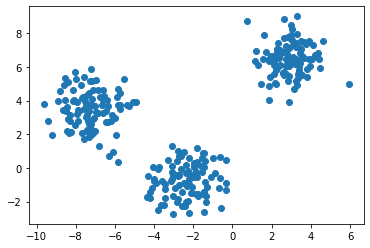

In [43]:
plt.scatter(myX[:,0], myX[:,1])
plt.show()

## An Overview ##

**Question:**  What distinguishes clustered data?

1. The number of clusters
2. The location of the center of each cluster
3. Points are in a cluster if they are closest to their center

**The Algorithm:** 

(See the [Wikipedia page](https://en.wikipedia.org/wiki/K-means_clustering).)

0. Initialization: Choose $k$ and $k$ points randomly in the data to be the initial means (centroids) $m^{(i)}_1 ,\ldots  m^{(i)}_k$. 
1. Assignment: assign each point to the cluster with the nearest mean:

$$
S^{(t)}_i = \{ x_p : \| x_p - - m^{(t)}_i\|^2 \le  \| x_p - - m^{(t)}_j\|^2 \forall j, 1 \le j \le k \}
$$

3. Update:  update the mean

$$
m^{(t+1)}_i = {1 \over |S^{(t)}_i|} \Sigma_{x_j \in S^{(t)}_i} x_j
$$

**Notes:**

+ This might not converge to the optimal answer.
+ This is a basic case of the Expectation-Maximization algorithm

## An implementation of K Means Clustering ##

From [here](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a).

In [78]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

In [11]:
my3means = Kmeans(n_clusters = 3)

In [44]:
my3means.fit(myX)

In [45]:
my3means.predict(np.array([[-2,2]]))

array([0])

## The SKLearn k-Means Clustering Implementation ##

See the textbook for more details.

In [79]:
from sklearn.cluster import KMeans

In [80]:
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(myX)

In [81]:
y_km

array([0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0,
       2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0,
       0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0,
       0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2,
       1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2,
       2, 2, 1, 2, 2, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 1,
       2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2], d

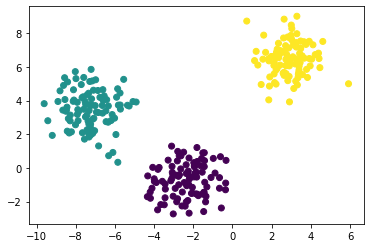

In [83]:
plt.scatter(myX[:,0], myX[:,1], c = y_km)